In [1]:
from itertools import count
from matplotlib.cbook import contiguous_regions
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.core.sorting import get_compressed_ids
from pandas_ods_reader import read_ods
from scipy.optimize import curve_fit
from lab_lib import *

In [86]:
p_atm = [(727.9, 0.1), (727.8, 0.1)] # mm rt st

p_atm_kpa = [(97.7, 0.1) , (97.8, 0.1)]

table = [[r"Барометр", r"До", r"После"],
         [r"1"] + [texAns(i) + r"$~торр$" for i in p_atm],
         [r"2"] + [texAns(i) + r"$~кПа$" for i in p_atm_kpa]]

texTable(table, caption="Атмосферное давление до и после проведения измерений")

p_atm += [tuple(j*7.5 for j in i) for i in p_atm_kpa]

p_atm = meanWithInacc(p_atm)

print(texAns(p_atm))



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        Барометр & До & После\\ \hline
        1 & $727.90 \pm 0.10$$~торр$ & $727.80 \pm 0.10$$~торр$\\ \hline
        2 & $97.70 \pm 0.10$$~кПа$ & $97.80 \pm 0.10$$~кПа$\\ \hline

    \end{tabular}
    \caption{Атмосферное давление до и после проведения измерений}
    \label{}
\end{table}

$730 \pm 2$




\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|}
        \hline

        $P_{изм}, торр$ & $t, с$ & $N_0$ & $N, с^{-1}$ & $P, торр$\\ \hline
        $-710$ & $10$ & $3697$ & $369.700$ & $20 \pm 2$\\ \hline
        $-700$ & $10$ & $3406$ & $340.600$ & $30 \pm 2$\\ \hline
        $-690$ & $10$ & $3337$ & $333.700$ & $40 \pm 2$\\ \hline
        $-680$ & $10$ & $3157$ & $315.700$ & $50 \pm 2$\\ \hline
        $-670$ & $10$ & $3035$ & $303.500$ & $60 \pm 2$\\ \hline
        $-660$ & $10$ & $2901$ & $290.100$ & $70 \pm 2$\\ \hline
        $-650$ & $10$ & $2725$ & $272.500$ & $80 \pm 2$\\ \hline
        $-640$ & $10$ & $2569$ & $256.900$ & $90 \pm 2$\\ \hline
        $-630$ & $16$ & $4054$ & $253.375$ & $100 \pm 2$\\ \hline
        $-620$ & $20$ & $4544$ & $227.200$ & $110 \pm 2$\\ \hline
        $-610$ & $15$ & $3208$ & $213.867$ & $120 \pm 2$\\ \hline
        $-600$ & $20$ & $3779$ & $188.950$ & $130 \pm 2$\\ \hline
        $-590$ & $15$ & $2741$ & $182.733$ & $140 \pm 2

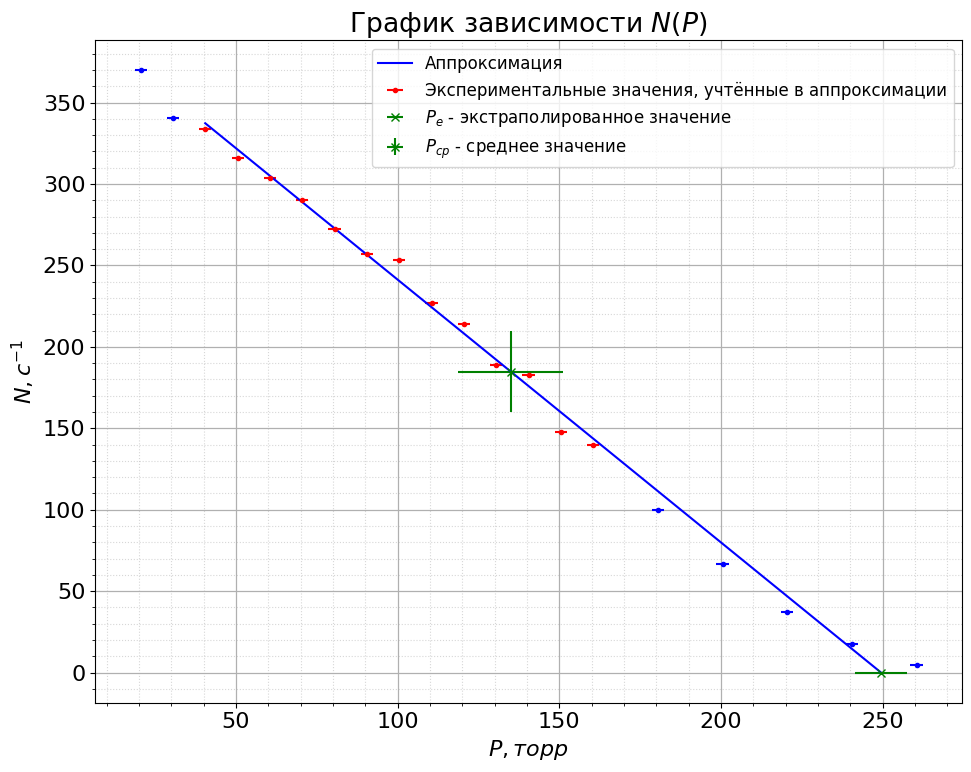

$k = $ $-1.61 \pm 0.05$
$b = $ $403 \pm 5$
$P_e = $ $250 \pm 8$
$P_mean = $ $130 \pm 20$
$R_e = $ $2.88 \pm 0.09$
$Rs_e = $ $0.00353 \pm 0.00011$
$E_e = $ $4.3 \pm 0.1$
$R_{ср} = $ $1.6 \pm 0.2$
$Rs_{ср} = $ $0.0019 \pm 0.0002$
$E_{ср} = $ $2.9 \pm 0.3$
2.1410634825457137e-07
5.845103307349799e-05


In [89]:
"""
Scint
"""

P_ = [-710, -700, -690, -680, -670, -660, -650, -640, -630, -620, -610, -600, -590, -580, -570, -550, -530, -510, -490, -470]
t  = [  10,   10,   10,   10,   10,   10,   10,   10,   16,   20,  15,    20,   15,   20,   20,   30,   40,   70,  100,  100]
N_ = [3697, 3406, 3337, 3157, 3035, 2901, 2725, 2569, 4054, 4544, 3208, 3779, 2741, 2960, 2793, 2988, 2668, 2586, 1777,  491]

N = [N_[i] / t[i] for i in range(len(P_))]

P = [P_[i] + p_atm[0] for i in range(len(P_))]
sigma_P = [np.sqrt(1**2 + p_atm[1]**2)]*len(P)

meas_table = [[r"$P_{изм}, торр$", r"$t, с$", r"$N_0$", r"$N, с^{-1}$", "$P, торр$"]]
for i in range(len(P)):
    meas_table.append(["$"+str(P_[i])+"$", "$"+str(t[i])+"$", "$"+str(N_[i])+"$", "$%.3f$" % N[i], texAns((P[i], sigma_P[i]))])

texTable(meas_table)

mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"График зависимости $N(P)$")
plt.ylabel(r"$N, с^{-1}$")
plt.xlabel(r"$P, торр$")

plt.errorbar(P[2:-5], N[2:-5], xerr = sigma_P[2:-5], fmt='.r', label = 'Экспериментальные значения, учтённые в аппроксимации')
plt.errorbar(P[0:2] + P[-5:], N[0:2] + N[-5:], xerr = sigma_P[0:2] + sigma_P[-5:], fmt='.b')

x = P[2:-5]
y = N[2:-5]

k_b = mnk(x, y)

k, b = k_b
P_e = (-b[0] / k[0], np.sqrt((-b[1]/k[0])**2 + (-b[0]*k[1]/k[0]**2)**2))

plt.errorbar(P_e[0], 0, xerr=P_e[1], fmt='xg', label=r"$P_e$ - экстраполированное значение")

N_mean = (max(N) / 2, 25)
print(max(N))

P_mean = ((N_mean[0] - b[0]) / k[0], np.sqrt((N_mean[1]/k[0])**2 + (b[1]/k[0])**2 + ((N_mean[0]-b[0])*k[1]/k[0]**2)**2))

plt.errorbar(P_mean[0], N_mean[0], xerr=P_mean[1], yerr=N_mean[1], fmt='xg', label=r"$P_{ср}$ - среднее значение")

x_lin = np.linspace(min(x), max(P_e), 1000)

plt.plot(x_lin, [i * k_b[0][0] + k_b[1][0] for i in x_lin], "b", label = "Аппроксимация")

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

plt.savefig("img/scint_exp.png")
plt.show()

print(r"$k = $", texAns(k))
print(r"$b = $", texAns(b))
print(r"$P_e = $", texAns(P_e))
print(r"$P_mean = $", texAns(P_mean))

def get_R(P):
    return countWithSigma(9 * P[0] / 760 * (273+15)/(273+22), [P])

R_e = get_R(P_e)
R_mean = get_R(P_mean)

def get_Rs(R):
    return countWithSigma(1.225/1000 * R[0], [R])

Rs_e = get_Rs(R_e)
Rs_mean = get_Rs(R_mean)

def get_E(R):
    return ((R[0]/0.32)**(2/3), R[0]**(-1/3)/0.32**(2/3)*R[1])

E_e = get_E(R_e)
E_mean = get_E(R_mean)

print(r"$R_e = $", texAns(R_e))
print(r"$Rs_e = $", texAns(Rs_e))
print(r"$E_e = $", texAns(E_e))

print(r"$R_{ср} = $", texAns(R_mean))
print(r"$Rs_{ср} = $", texAns(Rs_mean))
print(r"$E_{ср} = $", texAns(E_mean))

N_max = max(N)
A = N_max * 4*np.pi / 0.04
nu = A * 2.44*10**4*365*24*3600 / np.log(2) / (6.022*10**23)
print(nu)
m = nu * 273

print(m)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        $P_{изм}, торр$ & $P, торр$ & $I, пА$\\ \hline
        $-700$ & $30 \pm 2$ & $28$\\ \hline
        $-650$ & $80 \pm 2$ & $98$\\ \hline
        $-600$ & $130 \pm 2$ & $168$\\ \hline
        $-550$ & $180 \pm 2$ & $243$\\ \hline
        $-500$ & $230 \pm 2$ & $324$\\ \hline
        $-475$ & $255 \pm 2$ & $363$\\ \hline
        $-450$ & $280 \pm 2$ & $405$\\ \hline
        $-425$ & $305 \pm 2$ & $447$\\ \hline
        $-400$ & $330 \pm 2$ & $491$\\ \hline
        $-375$ & $355 \pm 2$ & $535$\\ \hline
        $-350$ & $380 \pm 2$ & $580$\\ \hline
        $-325$ & $405 \pm 2$ & $627$\\ \hline
        $-300$ & $430 \pm 2$ & $672$\\ \hline
        $-275$ & $455 \pm 2$ & $715$\\ \hline
        $-250$ & $480 \pm 2$ & $758$\\ \hline
        $-225$ & $505 \pm 2$ & $787$\\ \hline
        $-200$ & $530 \pm 2$ & $810$\\ \hline
        $-175$ & $555 \pm 2$ & $820$\\ \hline
        $-150$ & $580 \pm 2$ & $820$\\ \

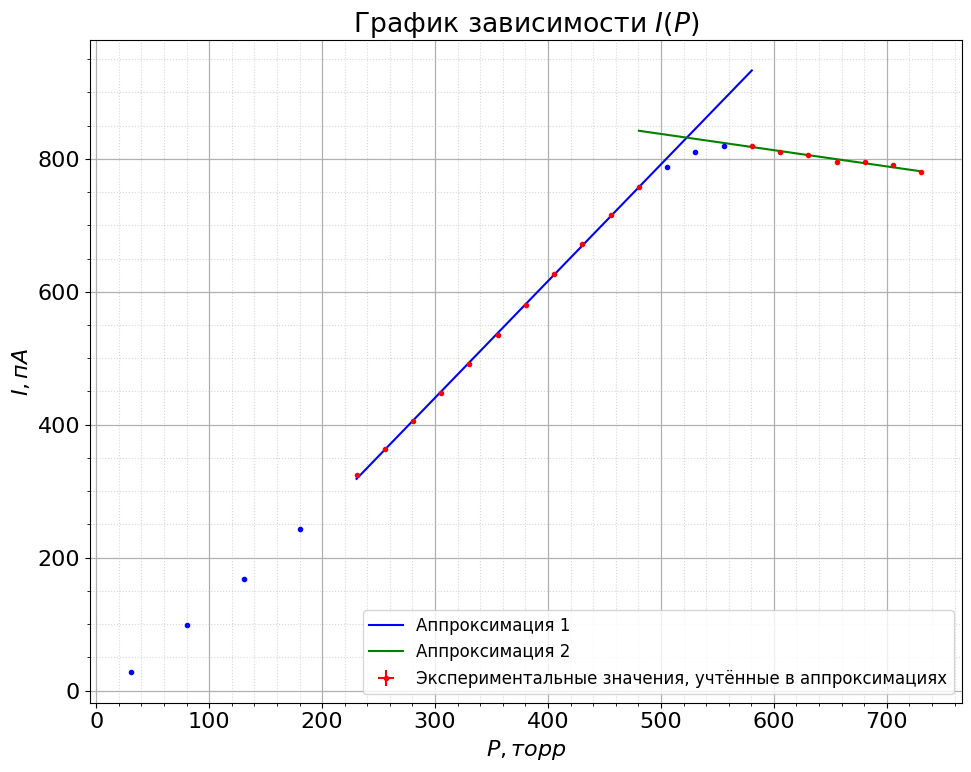

$k1 = $ $1.756 \pm 0.011$
$b1 = $ $-86 \pm 4$
$k2 = $ $-0.24 \pm 0.02$
$b2 = $ $960 \pm 10$
$P_e = $ $523 \pm 10$
$R = $ $3.19 \pm 0.06$
$Rs = $ $0.00391 \pm 0.00007$
$E = $ $4.63 \pm 0.08$
$R_{бумага} = $ $0.00489 \pm 0.00009$


In [91]:
"""
Ion
"""

P_ = [-700, -650, -600, -550, -500, -475, -450, -425, -400, -375, -350, -325, -300, -275, -250, -225, -200, -175, -150, -125, -100, -75, -50, -25,   0]
I  = [  28,   98,  168,  243,  324,  363,  405,  447,  491,  535,  580,  627,  672,  715,  758,  787,  810,  820,  820,  810,  806, 795, 795, 790, 780]

P = [i + p_atm[0] for i in P_]
sigma_P = [np.sqrt(1**2 + p_atm[1]**2)]*len(P)

meas_table = [[r"$P_{изм}, торр$", r"$P, торр$", r"$I, пА$"]]

for i in range(len(P)):
    meas_table.append(["$"+str(P_[i])+"$", texAns((P[i], sigma_P[i])), "$"+str(I[i])+"$"])

texTable(meas_table)

mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"График зависимости $I(P)$")
plt.ylabel(r"$I, пА$")
plt.xlabel(r"$P, торр$")

x0 = P[:4]
y0 = I[:4]
x1 = P[4:15]
y1 = I[4:15]
x2 = P[15:-7]
y2 = I[15:-7]
x3 = P[-7:]
y3 = I[-7:]

plt.errorbar(x0, y0, xerr = [1]*len(x0), yerr = [1]*len(x0), fmt='.b')
plt.errorbar(x2, y2, xerr = [1]*len(x2), yerr = [1]*len(x2), fmt='.b')

plt.errorbar(x1, y1, xerr = [1]*len(x1), yerr = [1]*len(x1), fmt='.r', label = 'Экспериментальные значения, учтённые в аппроксимациях')

plt.errorbar(x3, y3, xerr = [1]*len(x3), yerr = [1]*len(x3), fmt='.r')

k_b1 = mnk(x1, y1)
k_b2 = mnk(x3, y3)

k1, b1 = k_b1
k2, b2 = k_b2

P_e = ((b1[0] - b2[0]) / (k2[0] - k1[0]), np.sqrt((b1[1]**2 + b2[1]**2)/(k2[0] - k1[0])**2 + ((b1[0] - b2[0])*k2[1]/(k2[0]-k1[0])**2)**2 + ((b1[0] - b2[0])*k1[1]/(k2[0]-k1[0])**2)**2))

x_lin = np.linspace(min(x1), min(x3), 1000)
plt.plot(x_lin, [i * k_b1[0][0] + k_b1[1][0] for i in x_lin], "b", label = "Аппроксимация 1")

x_lin = np.linspace(max(x1), max(x3), 1000)
plt.plot(x_lin, [i * k_b2[0][0] + k_b2[1][0] for i in x_lin], "g", label = "Аппроксимация 2")

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

plt.savefig("img/ion_exp.png")
plt.show()

print(r"$k1 = $", texAns(k1))
print(r"$b1 = $", texAns(b1))
print(r"$k2 = $", texAns(k2))
print(r"$b2 = $", texAns(b2))
print(r"$P_e = $", texAns(P_e))

def get_R(P):
    return countWithSigma(4.75 * P[0] / 760 * (273+15)/(273+22), [P])

R = get_R(P_e)
Rs = get_Rs(R)
E = get_E(R)

print(r"$R = $", texAns(R))
print(r"$Rs = $", texAns(Rs))
print(r"$E = $", texAns(E))

R_paper = tuple(i / 0.8 for i in Rs)

print(r"$R_{бумага} = $", texAns(R_paper))